In [33]:
import pandas as pd
import seaborn as sns
import pylab as plt
%pylab inline
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [34]:
#считываем данные из таблиц 'training.xlsx,'testing.xlsx'
data = pd.read_excel('training.xlsx', index_col=0, parse_cols=1, dayfirst=True)
test = pd.read_excel('testing.xlsx', index_col=0, parse_cols=1, dayfirst=True)
alldata = pd.concat([data,test])

In [35]:
data.head()#выводим начало таблицы

,Value
Date,
1959-01-01,22.8331
1959-02-01,23.2802
1959-03-01,23.6156
1959-04-01,24.1186
1959-05-01,24.4820


In [36]:
data.info()#выводим информацию о данных

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 1959-01-01 to 1988-12-01
Data columns (total 1 columns):
Value    360 non-null float64
dtypes: float64(1)
memory usage: 5.6 KB


In [37]:
data.isnull().sum()#проверяем что среди значений нет нулевых элементов

Value    0
dtype: int64

# Task 1.1

In [38]:
d = data.copy(deep=True)
mean_20 = d.Value.rolling(window=20).mean()#получаем среднее
 

In [39]:
de = data.copy(deep=True)
std_error_20 = de.Value.rolling(20).std()#получаем скользящее отклонение

In [40]:
data = pd.read_excel('training.xlsx', index_col=0, parse_cols=1, dayfirst=True)

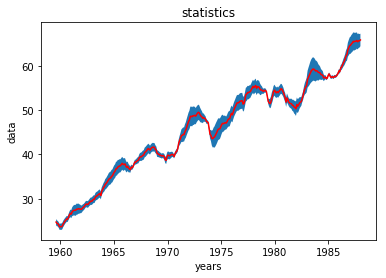

In [11]:
#отрисовываю ряд и среднее,скользящее отклонение
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(1958,1988,360)
yy = data.copy(deep=True)
y = yy.Value
error = std_error_20
y += std_error_20
title('statistics')
plt.plot(x, y, 'r-')
plt.fill_between(x, y-error, y+error)
plt.xlabel('years')
plt.ylabel('data')
plt.show()
plt.show()

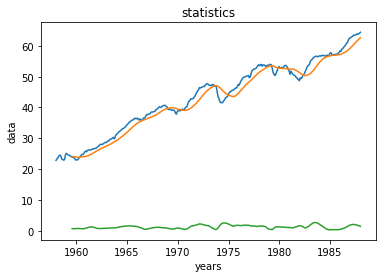

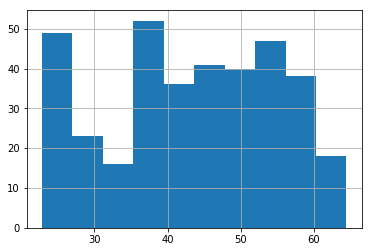

In [94]:
from pandas import Series
from matplotlib import pyplot


x = np.linspace(1958,1988,360)
title('statistics')
plt.plot(x, data['Value'])#отрисовываю ряд
 
plt.plot(x, mean_20)#отрисоваваю среднее
 
plt.plot(x, std_error_20)#отрисоваваю стандартное отклонение
 
plt.xlabel('years')
plt.ylabel('data')
plt.show()

series = Series.from_array(data.Value)
#series.plot()
pyplot.show()
series.hist()#отрисуем гистограмму



# Task 1.2

In [42]:
from pandas import Series
from matplotlib import pyplot
from numpy import log
series = Series.from_array(data.Value)
X = series.values
# X = log(X)
splited = int(len(X) / 2)
X1, X2 = X[0:splited], X[splited:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


mean1=33.901469, mean2=52.793098
variance1=52.883936, variance2=29.960610


# Diki Fuller test

In [43]:
#используя функцию adfuller находим,что у временного ряда есть единичные корни,то есть он не стационарен
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = Series.from_array(data.Value)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.253391
p-value: 0.931851
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


# итог

по данным, полученным из теста Дики-Фуллера имеем нестационарность временного ряда по значениям ADF и p-value

# Task 2

# additive

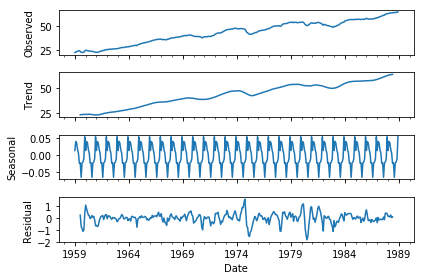

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data.Value, model='additive')
#раскладываю функцию на тренд и 
#сезональностьс помощью функции seasonal_decompose,используя аддитивную модель
decomp.plot()
plt.show()

# multiplicative

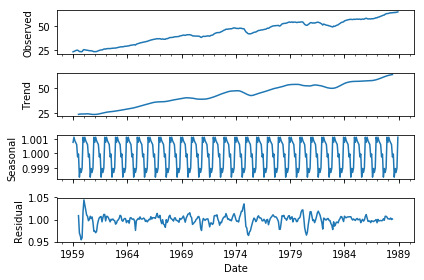

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data.Value, model='multiplicative')
#раскладываю функцию на тренд и 
#сезональностьс помощью функции seasonal_decompose,используя мультипликативную модель
decomp.plot()
plt.show()

# итог

из графика видно,что ряд не является стационарным

# Task 3

In [46]:
import statsmodels.api as sm

In [47]:
datadiff = data.Value.diff(periods=1).dropna()

In [48]:
#провожу тест дики-фулера для ряда разностей.Он стационарен-значен исходный ряд является интегрированным рядом первого порядка
test = sm.tsa.adfuller(datadiff)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -7.367311495211982
p-value:  9.164149561098284e-11
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
единичных корней нет, ряд стационарен


In [49]:
m = datadiff.index[int(len(datadiff.index)/2+1)]
 
 
r1 = sm.stats.DescrStatsW(datadiff[m:])
r2 = sm.stats.DescrStatsW(datadiff[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.32245296925444644


высокое p-value свидетельствует о том что нулевая гипотеза о равенстве средних верна.Значит ряд стационарен.

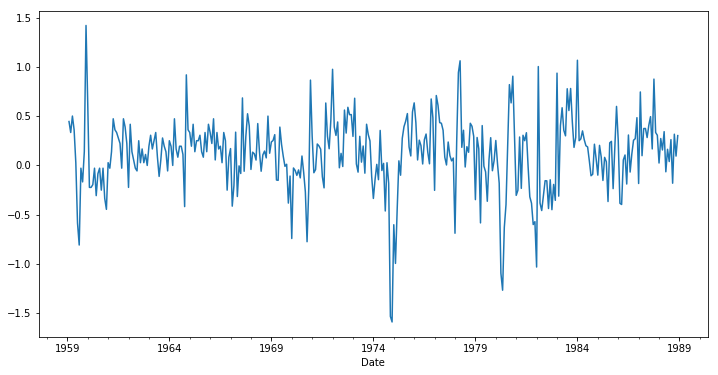

In [50]:
datadiff.plot(figsize=(12,6))

тренд отсутствует -> ряд первых разностей является стационарным, а наш исходный ряд — интегрированным рядом первого порядка.

# ARIMA model

In [51]:
#Для моделирования будем использовать модель ARIMA, построенную для ряда первых разностей.
#Для построения модели нужны 3 параметра:p — порядок компоненты AR,d — порядок интегрированного ряда,q — порядок компонетны MA.d 
#известен и равен 1.По коррелограмме ACF определяем q=количество автокорреляционных коэффициентов сильно отличных от 0 в модели 
#MA оно равно 2.По коррелограмме PACF можно определить p=максимальный номер коэффициента сильно отличный от 0 в модели AR оно 
#равно 2.

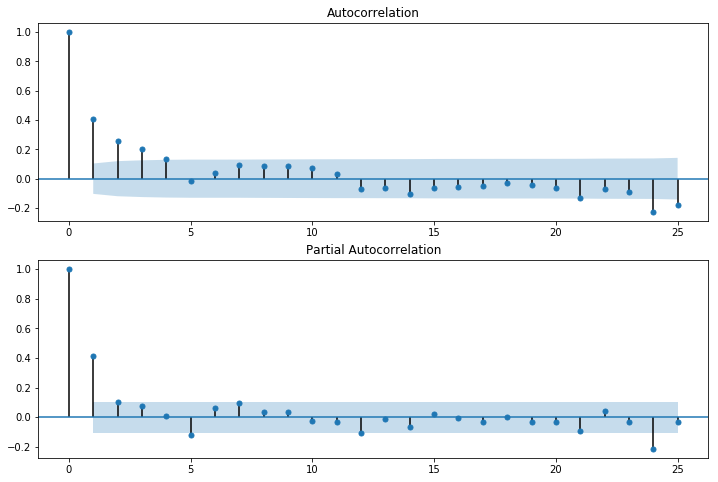

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datadiff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datadiff, lags=25, ax=ax2)

In [53]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 


model = ARIMA(data['Value'], order=(2,1,2))
model_fit = model.fit(disp=0)

In [54]:
len(data['Value']['1970':])

228

In [55]:
model = sm.tsa.ARIMA(data['Value'], order=(2,1,2)).fit(disp=0)

In [348]:
model.summary()#получаем харектеристику модели arima

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -120.253
Method:                       css-mle   S.D. of innovations              0.338
Date:                Wed, 05 Dec 2018   AIC                            252.506
Time:                        10:27:15   BIC                            275.806
Sample:                    02-01-1959   HQIC                           261.772
                         - 12-01-1988                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1177      0.036      3.227      0.001       0.046       0.189
ar.L1.D.Value     0.4162      0.688      0.605      0.546      -0.933       1.765
ar.L2.D.Value     0.1794      0.440      0.407      0.684      -0.684       1.043
ma.L1.D.Value    -0.0550      0.687     -0.080      0.936      -1.401       1.291
ma.L2.D.Value    -0.1149      0.207     -0.555      0.579      -0.520       0.290
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4705           +0.0000j            1.4705            0.0000
AR.2           -3.7899           +0.0000j            3.7899            0.5000
MA.1            2.7207           +0.0000j            2.7207            0.0000
MA.2           -3.2000           +0.0000j            3.2000            0.5000
-----------------------------------------------------------------------------
"""

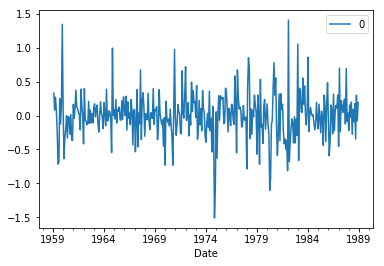

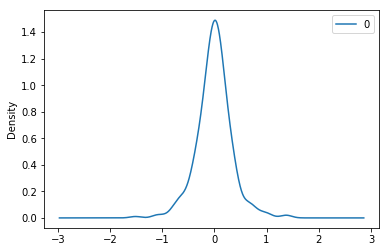

                0
count  359.000000
mean    -0.000719
std      0.338701
min     -1.510103
25%     -0.160251
50%      0.010844
75%      0.167767
max      1.405584


In [56]:
residuals = pd.DataFrame(model.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Autocorrelation

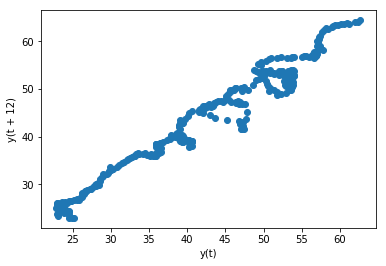

In [57]:
from pandas.tools.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_array(data.Value)
lag_plot(series, lag=12)
pyplot.show()

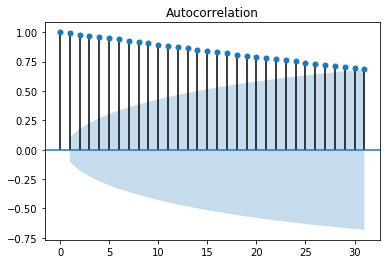

In [58]:
plot_acf(series, lags=31)
pyplot.show()

# Prediction for test data

In [90]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
 

In [68]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

       Q-stat   p-value
0    0.001348  0.970717
1    0.008958  0.995531
2    0.352971  0.949777
3    1.021815  0.906470
4    8.265750  0.142185
5    8.449179  0.207007
6    9.776102  0.201621
7   10.214136  0.250317
8   11.281879  0.256881
9   12.118966  0.277173
10  12.805533  0.306226
11  15.494358  0.215508
12  15.602804  0.271245
13  18.315275  0.192797
14  18.375485  0.243440
15  18.442116  0.298650
16  18.478599  0.359267
17  18.564119  0.419113
18  18.583440  0.483836
19  18.584196  0.548982
20  22.509451  0.370680
21  22.778176  0.414345
22  23.084587  0.455841
23  34.694863  0.073055
24  37.377355  0.053145
25  37.463658  0.067856
26  40.208759  0.048978
27  40.363906  0.061349
28  41.039010  0.068328
29  41.106359  0.085153
30  41.499757  0.098574
31  41.645534  0.118254
32  42.569785  0.122917
33  44.481925  0.107679
34  44.992279  0.120090
35  45.072429  0.142809
36  45.907566  0.149505
37  47.621323  0.136256
38  47.640708  0.161455
39  47.725853  0.187488


# pred 1

In [60]:
len(data.Value['1986-08-11':])

28

In [61]:
pred = model.predict(333, 360, typ='levels')
trn = data.Value['1986-08-11':] # [:'1970-08-14']
r2 = r2_score(trn, pred) #[1:33])
print('R^2 score: %1.2f' % r2)

R^2 score: 0.99


In [64]:
pred = model.predict(360,422,typ='levels')

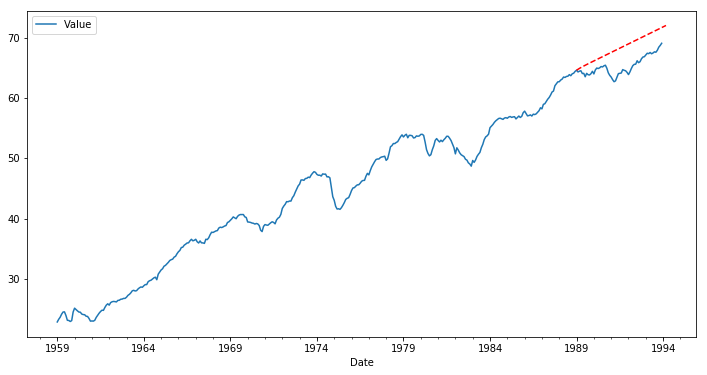

In [398]:
# data.plot()
# test.plot()#figsize=(12,6))
alldata.plot(figsize=(12,6))
pred.plot(style='r--')

# pred 2

In [76]:
model2 = sm.tsa.ARIMA(data['Value'], order=(1,1,1)).fit(disp=0)

In [82]:
 len(data.Value['1988-03-01':])

10

In [95]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.367
Method:                       css-mle   S.D. of innovations              0.338
Date:                Sat, 08 Dec 2018   AIC                            248.734
Time:                        01:23:40   BIC                            264.267
Sample:                    02-01-1959   HQIC                           254.911
                         - 12-01-1988                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1176      0.036      3.271      0.001       0.047       0.188
ar.L1.D.Value     0.6531      0.091      7.185      0.000       0.475       0.831
ma.L1.D.Value    -0.2984      0.115     -2.601      0.010      -0.523      -0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5313           +0.0000j            1.5313            0.0000
MA.1            3.3516           +0.0000j            3.3516            0.0000
-----------------------------------------------------------------------------
"""

In [87]:
from sklearn.metrics import r2_score
pred = model2.predict(351, 360, typ='levels')
trn = data.Value['1988-03-01':] # [:'1970-08-14']
r3 = r2_score(trn, pred) #[1:33])
print('R^2 score: %1.2f' % r3)


R^2 score: 0.85


In [89]:
pred = model2.predict(360,422,typ='levels')

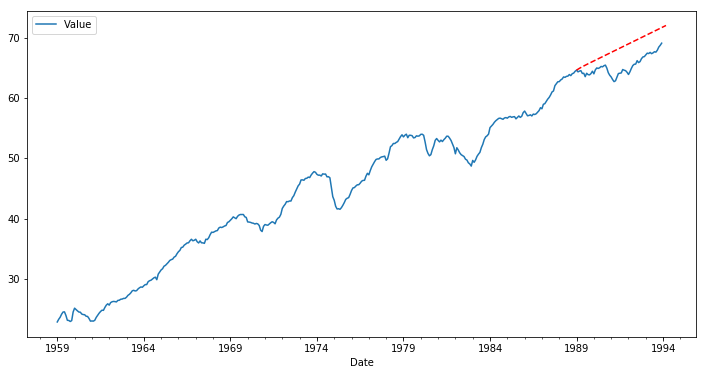

In [86]:
alldata.plot(figsize=(12,6))
pred.plot(style='r--')

AIC

У ВТОРОЙ МОДЕЛИ ПАРАМЕТР AIC-248 МЕНЬШЕ ЧЕМ У ВТОРОЙ-252.,ПОТОМУ ОНА ПРЕДПОЧТИЕТЕЛЬНЕЕ
